In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
import os
import glob
import keras
import tensorflow as tf

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD


In [2]:
# Load the equation classifer model  
model = tf.keras.models.load_model('./equationClassifier.h5')
model.summary()

2022-07-20 07:16:08.751961: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 15)        150       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 15)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 5)         680       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 5)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 980)               0         
                                                                 
 dense (Dense)               (None, 10)                9

(4032, 3024)
<class 'numpy.ndarray'>


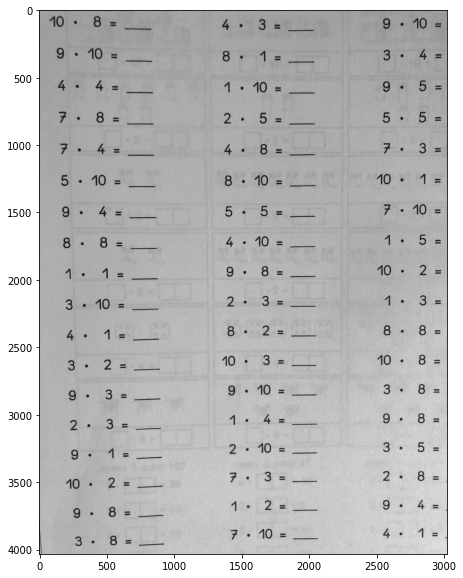

In [3]:
# Load the image on which mathematical equations should be detected
img = mpimg.imread('testImages/testImage1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Print image information and plot 
print(img.shape)
print(type(img))
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

In [4]:
# SLIDING WINDOW approach --> Crop single pieces of a picture and as for each single one whether there´s an equation or not
# --> With this approach one can not only ask whethr there´s an equation on the entire picture 
# but also where the equation is actually located on the picture


windowSize_x = 250
windowSize_y = 800
step_size_x = 50
step_size_y = 100

croppedImgList = []

# Iterate over picture 
for x in range(0, img.shape[0] - windowSize_x, step_size_x):
    for y in range (0, img.shape[1] - windowSize_y, step_size_y):
        croppedImg = img[x:x+windowSize_x, y:y+windowSize_y]
        resizedImg = cv2.resize(croppedImg, (64,64)).reshape(1,64,64,1)
        normalizedImg = resizedImg/255.0
        croppedImgList.append(normalizedImg)
        # Convert data in order to fit NN input requirement
        #data = data.astype(np.float32) / 255.
        #data = data.reshape(1, 32, 32, 3)
        # Ask Neural Network
        #prediction = carClassifier.predict(data)
        #print("The probabiity that this slide contains a car is: ", prediction[0][0])
        #if prediction[0][0] > 0.8: 
        #    whereAreCars.append((x, y))
            
# In which slides (at which coordinates) did the NN predict (i.e. classify) a car?
#print(whereAreCars)

1748
1/1 [==============================] - 0s 113ms/step
[[3.3423264e-11 1.0000000e+00]]


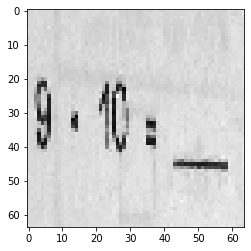

In [5]:
print(len(croppedImgList))
n = 93
sample = croppedImgList[n]
samplePlot = sample.reshape(64,64,1)
plt.imshow(samplePlot, cmap='gray')

# Would this crop be predicted as equation? 
prediction = model.predict(sample)
print(prediction)

In [ ]:
# If we found a picture, draw the corresponding bounding box
# Draw the corresponding slide on the original picture --> Location of car

draw = ImageDraw.Draw(copyForDrawing)
for car in whereAreCars: 
    points = [car, (car[0] + windowSize, car[1] + windowSize)]
    draw.rectangle(points)

In [ ]:
# SLIDING WINDOW APPROACH is a verry common approach 
# Drawback: It takes forever

# --> Another concept: YOLO (YOU ONLY LOOK ONCE)
# Not that exact but very fast
# Approach
# Split entire picture into segments
# Operate on each single segment (feed it int to CNN)
#    --> (1) What is in the segment (probability of car, pedestrian, ...)
#    --> (2) Where is the center point and length and width of the corresponding object bounding box 
